<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Sources of Error

Error can come from many sources when using applying a numerical method:
 - Model/Data Error
 - Truncation Error
 - Floating Point Error
 
**Goal:** Categorize and understand each type of error and explore some simple approaches to analyzing error.

## Model and Data Error

Errors in fundamental formulation
 - Lotka-Volterra - fractional rabbits, no extinctions, etc.
 - Data Error - Inaccuracy in measurement or uncertainties in parameters
 
Unfortunatley we cannot control model and data error directly but we can use methods that may be more robust in the presense of these types of errors.

## Truncation Error

Errors arising from approximating a function with a simpler function (e.g. $sin(x) \approx x$ for $|x| \approx 0$. 

## Floating Point Error

Errors arising from approximating real numbers with finite-precision numbers and arithmetic.

## Basic Definitions

Given a true value of a function $f$ and an approximate solution $\hat{f}$ define:

Absolute Error:  $e = |f - \hat{f}|$

Relative Error:  $r = \frac{e}{|f|} = \frac{|f - \hat{f}|}{|f|}$

Decimal precision $p$ is defined as the minimum value that satisfies

$$x = \text{round}(10^{-n} \cdot x) \cdot 10^n$$

where

$$n = \text{floor}(\log_{10} x) + 1 - p$$

Note that if we are asking the decimal precision of the approximation $\hat{f}$ of $f$ then we need to use the absolute error to determine the precision.  To find the decimal precision in this case look at the magnitude of the absolute error and deterimine the place of the first error.  Combine this with the number of "correct" digits and you will get the decimal precision of the approximation.

## Truncation Error and Taylor's Theorem

**Taylor's Theorem:**  Let $f(x) \in C^{m+1}[a,b]$ and $x_0 \in [a,b]$, then for all $x \in (a,b)$ there exists a number $c = c(x)$ that lies between $x_0$ and $x$ such that

$$ f(x) = T_N(x) + R_N(x)$$

where $T_N(x)$ is the Taylor polynomial approximation

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot(x-x_0)^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot (x - x_0)^{n+1}}{(n+1)!}$$

Another way to think about these results involves replacing $x - x_0$ with $\Delta x$.  The primary idea here is that the residual $R_N(x)$ becomes smaller as $\Delta x \rightarrow 0$.

$$T_N(x) = \sum^N_{n=0} \frac{f^{(n)}(x_0)\cdot\Delta x^n}{n!}$$

and $R_N(x)$ is the residual (the part of the series we left off)

$$R_N(x) = \frac{f^{(n+1)}(c) \cdot \Delta x^{n+1}}{(n+1)!} \leq M \Delta x^{n+1} = O(\Delta x^{n+1})$$

#### Example 1

$f(x) = e^x$ with $x_0 = 0$

Using this we can find expressions for the relative and absolute error as a function of $x$ assuming $N=2$.

$$f'(x) = e^x, ~~~ f''(x) = e^x ~~~ f^{(n)}(x) = e^x$$

$$T_N(x) = \sum^N_{n=0} e^0 \frac{x^n}{n!} ~~~~\Rightarrow ~~~~ T_2(x) = 1 + x + \frac{x^2}{2}$$

$$R_N(x) = e^c \frac{x^{n+1}}{(n+1)!} = e^c \cdot \frac{x^3}{6} ~~~~ \Rightarrow ~~~~ R_2(x) \leq \frac{e^1}{6} \approx 0.5$$

$$e^1 = 2.718\ldots$$

$$T_2(1) = 2.5 \Rightarrow e \approx 0.2 ~~ r \approx 0.1$$

We can also use the package sympy which has the ability to calculate Taylor polynomials built-in!

In [3]:
import sympy
x = sympy.symbols('x')
f = sympy.symbols('f', cls=sympy.Function)

f = sympy.exp(x)
f.series(x0=0, n=6)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

Lets plot this numerically for a section of $x$.

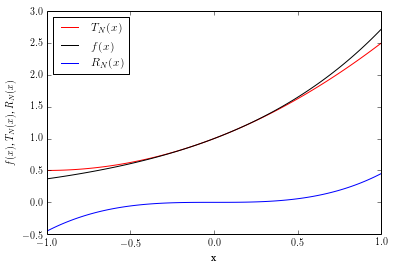

In [4]:
x = numpy.linspace(-1, 1, 100)
T_N = 1.0 + x + x**2 / 2.0
R_N = numpy.exp(1) * x**3 / 6.0

plt.plot(x, T_N, 'r', x, numpy.exp(x), 'k', x, R_N, 'b')
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=2)
plt.show()

#### Example 2

$f(x) = \frac{1}{x} ~~~~~~ x_0  = 1$, approximate with $\hat{f}(x) = T_2(x)$

$$f'(x) = -\frac{1}{x^2} ~~~~~~~ f''(x) = \frac{2}{x^3} ~~~~~~~ f^{(n)}(x) = \frac{(-1)^n n!}{x^{n+1}}$$

$$T_N(x) = \sum^N_{n=0} (-1)^n (x-1)^n ~~~~ \Rightarrow ~~~~ T_2(x) = 1 - (x - 1) + (x - 1)^2$$

$$R_N(x) = \frac{(-1)^{n+1}(x - 1)^{n+1}}{c^{n+2}} ~~~~ \Rightarrow ~~~~ R_2(x) = \frac{-(x - 1)^{3}}{c^{4}}$$

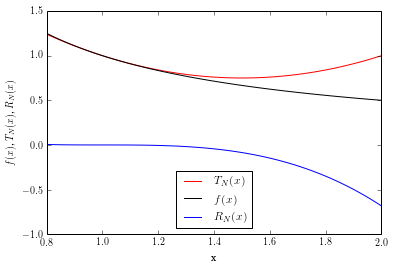

In [5]:
x = numpy.linspace(0.8, 2, 100)
T_N = 1.0 - (x-1) + (x-1)**2
R_N = -(x-1.0)**3 / (1.1**4)

plt.plot(x, T_N, 'r', x, 1.0 / x, 'k', x, R_N, 'b')
plt.xlabel("x")
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$")

plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$"], loc=8)
plt.show()

### Symbols and Definitions

Big-O notation: $f(x) = \text{O}(g(x))$ as $x \rightarrow a$ if and only if $|f(x)| \leq M |g(x)|$ as $|x - a| < \delta$ for $M$ and $a$ positive.

In practice we use Big-O notation to say something about how the terms we may have left out of a series might behave.  We saw an example earlier of this with the Taylor's series approximations:

#### Example:
$f(x) = \sin x$ with $x_0 = 0$ then

$$T_N(x) = \sum^N_{n=0} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!}$$

We can actually write $f(x)$ then as

$$f(x) = x - \frac{x^3}{6} + \frac{x^5}{120} + O(x^7)$$

This becomes more useful when we look at this as we did before with $\Delta x$:

$$f(x) = \Delta x - \frac{\Delta x^3}{6} + \frac{\Delta x^5}{120} + O(\Delta x^7)$$

**We can also develop rules for error propagation based on Big-O notation:**

In general, there are two theorems that do not need proof and hold when the value of x is large: 

Let
$$f(x) = p(x) + O(x^n)$$
$$g(x) = q(x) + O(x^m)$$
$$k = \max(n, m)$$ then
$$f+g = p + q + O(x^k)$$
$$f \cdot g = p \cdot q + O(x^{n\cdot m})$$

On the other hand, if we are interested in small values of x, say Δx, the above expressions can be modified as follows: 

$$f(\Delta x) = p(\Delta x) + O(\Delta x^n)$$
$$g(\Delta x) = q(\Delta x) + O(\Delta x^m)$$
$$r = \min(n, m)$$ then

$$f+g = p + q + O(\Delta x^r)$$

$$f \cdot g = p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) = p \cdot q + O(\Delta x^r)$$

**Note 1:** In this case we suppose that at least the polynomial with $k = \max(n, m)$ has the following form: 
$$p(\Delta x) = 1 + p_1x + p_2x^2 + ...$$
or $$q(\Delta x) = 1 + q_1x + q_2x^2 + ...$$
so that there is an O(1) term that guarantees the existence of $O(\Delta x^r)$ in the final product. 

To get a sense of why we care most about the power on $\Delta x$ when considering convergence the following figure shows how different powers on the convergence rate can effect how quickly we converge to our solution.  Note that here we are plotting the same data two different ways.  Plotting the error as a function of $\Delta x$ is a common way to show that a numerical method is doing what we expect and exhbits the correct convergence behavior.  Since errors can get small quickly it is very common to plot these sorts of plots on a log-log scale to easily visualize the results.  Note that if a method was truly of the order $n$ that they will be a linear function in log-log space with slope $n$.

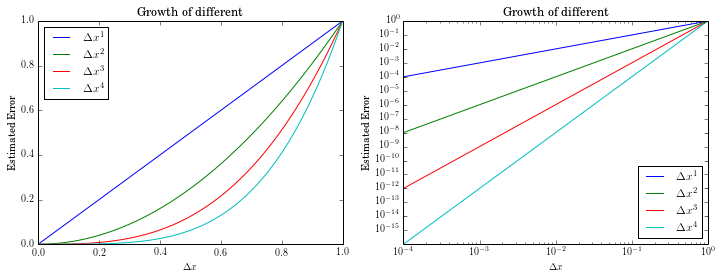

In [6]:
dx = numpy.linspace(1.0, 1e-4, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
axes = []
axes.append(fig.add_subplot(1, 2, 1))
axes.append(fig.add_subplot(1, 2, 2))

for n in xrange(1, 5):
    axes[0].plot(dx, dx**n, label="$\Delta x^%s$" % n)
    axes[1].loglog(dx, dx**n, label="$\Delta x^%s$" % n)

axes[0].legend(loc=2)
axes[1].set_xticks([10.0**(-n) for n in xrange(5)])
axes[1].set_yticks([10.0**(-n) for n in xrange(16)])
axes[1].legend(loc=4)
for n in xrange(2):
    axes[n].set_title("Growth of Error vs. $\Delta x^n$")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")
    axes[n].set_title("Growth of different")
    axes[n].set_xlabel("$\Delta x$")
    axes[n].set_ylabel("Estimated Error")

plt.show()

## Horner's Method for Evaluating Polynomials

Given 

$$P_N(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_N x^N$$ 

$$P_N(x) = p_1 x^N + p_2 x^{N-1} + p_3 x^{N-2} + \ldots + p_{N+1}$$

want to find best way to evaluate $P_N(x)$.  First consider two ways to write $P_3$:

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

and using nested multiplication:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$




Consider how many operations it takes for each...

$$ P_3(x) = p_1 x^3 + p_2 x^2 + p_3 x + p_4$$

$$P_3(x) = \overbrace{p_1 \cdot x \cdot x \cdot x}^3 + \overbrace{p_2 \cdot x \cdot x}^2 + \overbrace{p_3 \cdot x}^1 + p_4$$

Adding up all the operations we can in general think of this as a pyramid

![Original Count](./images/horners_method_big_count.png)

We can estimate this way that the algorithm written this way will take approximately $O(N^2 / 2)$ operations to complete.

Looking at our other means of evaluation:

$$ P_3(x) = ((p_1 x + p_2) x + p_3) x + p_4$$

Here we find that the method is $O(N)$ (the 2 is usually ignored in these cases).  The important thing is that the first evaluation is $O(N^2)$ and the second $O(N)$!

### Algorithm

Fill in the function and implement Horner's method:
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    pass
```

```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x should be a float.
    """
    
    y = p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y
```

or an alternative version that allows `x` to be a vector of values:
```python
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y
```
This version calculates each `y` value simultaneously making for much faster code!

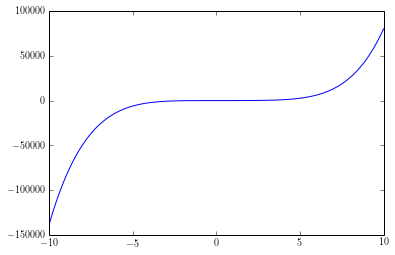

In [7]:
def eval_poly(p, x):
    """Evaluates polynomial given coefficients p at x
    
    Function to evaluate a polynomial in order N operations.  The polynomial is defined as
    
    P(x) = p[0] x**n + p[1] x**(n-1) + ... + p[n-1] x + p[n]
    
    The value x can by a NumPy ndarray.
    """
    
    y = numpy.ones(x.shape) * p[0]
    for coefficient in p[1:]:
        y = y * x + coefficient
    
    return y

p = [1, -3, 10, 4, 5, 5]
x = numpy.linspace(-10, 10, 100)
plt.plot(x, eval_poly(p, x))
plt.show()

## Truncation Error vs. Floating Point Error

Truncation error:  Errors arising from approximation of a function, truncation of a series...

$$\sin x \approx x - \frac{x^3}{3!} + \frac{x^5}{5!} + O(x^7)$$

Floating-point Error:  Errors arising from approximating real numbers with finite-precision numbers

$$\pi \approx 3.14$$

or $\frac{1}{3} \approx 0.333333333$ in decimal, results form finitely number of registers to represent each number.


## Floating Point Systems

Numbers in floating point systems are represented as a series of bits that represent different pieces of a number.  In *nomalized floating point systems* there are some standar conventions for what these bits are used for.  In general the numbers are stored by breaking them down into the form  

$$\hat{f} = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

where
1. $\pm$ is a single bit and of course represents the sign of the number
2. $d_1 . d_2 d_3 d_4 \ldots d_p$ is called the *mantissa*.  Note that technically the decimal could be moved but generally, using scientific notation, the decimal can always be placed at this location.  The digits $d_2 d_3 d_4 \ldots d_p$ are called the *fraction* with $p$ digits of precision.  Normalized systems specifically put the decimal point in the front like we have and assume $d_1 \neq 0$ unless the number is exactly $0$.
3. $\beta$ is the *base*.  For binary $\beta = 2$, for decimal $\beta = 10$, etc.
4. $E$ is the *exponent*, an integer in the range $[E_{\min}, E_{\max}]$

The important points on any floating point system is that
1. There exist a discrete and finite set of representable numbers
2. These representable numbers are not evenly distributed on the real line
3. Airthmetic in floating point systems yield different results from infinite precision arithmetic (i.e. "real" math)

### Example:  Toy System
Consider the toy 2-digit precision decimal system (normalized)
$$f = \pm d_1 . d_2 \times 10^E$$
with $E \in [-2, 0]$.

#### Number and distribution of numbers
1. How many numbers can we represent with this system?

2. What is the distribution on the real line?

3. What is the underflow and overflow limits?


How many numbers can we represent with this system?

$f = \pm d_1 . d_2 \times 10^E$ with $E \in [-2, 0]$.

$$ 2 \times 9 \times 10 \times 3 + 1 = 541$$

What is the distribution on the real line?

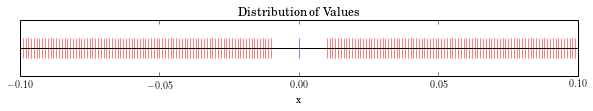

In [8]:
d_1_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
d_2_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
E_values = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-0.1, 0.1])
plt.show()

What is the underflow and overflow limits?

Smallest number that can be represented is the underflow:  $1.0 \times 10^{-2} = 0.01$
Largest number that can be represented is the overflow:  $9.9 \times 10^0 = 9.9$

## Properties of Floating Point Systems
All floating-point systems are characterized by several important numbers
 - Smalled normalized number (underflow if below)
 - Largest normalized number (overflow if above)
 - Zero
 - Machine $\epsilon$ or $\epsilon_{\text{machine}}$
 - `inf` and `nan`, infinity and **N**ot **a** **N**umber respectively
 - Subnormal numbers

## Binary Systems
Consider the 2-digit precision base 2 system:

$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{with} ~~~~ E \in [-1, 1]$$

#### Number and distribution of numbers
1. How many numbers can we represent with this system?

2. What is the distribution on the real line?

3. What is the underflow and overflow limits?


How many numbers can we represent with this system?

$$f=\pm d_1 . d_2 \times 2^E ~~~~ \text{with} ~~~~ E \in [-1, 1]$$

$$ 2 \times 1 \times 2 \times 3 + 1 = 13$$

What is the distribution on the real line?

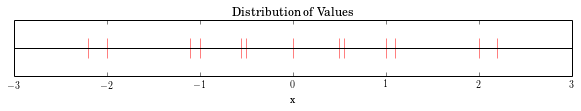

In [9]:
d_1_values = [1]
d_2_values = [0, 1]
E_values = [1, 0, -1]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            axes.plot( (d1 + d2 * 0.1) * 2**E, 0.0, 'r+', markersize=20)
            axes.plot(-(d1 + d2 * 0.1) * 2**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-4.5, 4.5], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-3, 3])
plt.show()

Smallest number that can be represented is the underflow:  $1.0 \times 2^{-1} = 0.25$
Largest number that can be represented is the overflow:  $1.1 \times 2^1 = 2.2$

## Real Systems - IEEE 754 Binary Floating Point Systems

### Single Precision
 - Total storage alloted is 32 bits
 - Exponent is 8 bits $\Rightarrow E \in [-126, 127]$
 - Fraction 23 bits ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
Overflow $= 2^{127} \approx 3.4 \times 10^{38}$

Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$

$\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^7$

### Double Precision
 - Total storage alloted is 64 bits
 - Exponent is 11 bits $\Rightarrow E \in [-1022, 1024]$
 - Fraction 52 bits ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$

Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$

$\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### Python Access to IEEE Numbers

Access many important parameters, such as machine epsilon:

```python
import numpy
numpy.finfo(float).eps
```

In [10]:
print numpy.finfo(float).eps
print numpy.finfo(float).max
print numpy.finfo(float).min
print numpy.finfo(float).nmant
print numpy.finfo(float).precision
print numpy.finfo(float).tiny

2.22044604925e-16
1.79769313486e+308
-1.79769313486e+308
52
15
2.22507385851e-308


## Why should we care about this?

 - Floating point arithmetic is not commutative or associative
 - Floating point errors compound, do not assume even double precision is enough!
 - Mixing precision is very dangerous

 ### Examples
 
Simple arithmetic $\delta < \epsilon_{\text{machine}}$

   $$(1+\delta) - 1 = 1 - 1 = 0$$

   $$1 - 1 + \delta = \delta$$

Catastrophic cancelation (assume $x + y \neq 0$):

$$x(1 + \epsilon_x) + y (1 + \epsilon_y) = x + y + x \epsilon_x + y \epsilon_y =(x+y) \left( 1 + \frac{x \epsilon_x + y \epsilon_y}{x+y} \right ) \Rightarrow$$

$$\epsilon_{x+y} = \frac{x}{x + y} \epsilon_x  + \frac{y}{x+y} \epsilon_y$$

This implies that the error made from doing the actual sum can be arbitrarily large!  This is not too bad unless $x$ and $y$ have opposite sign, then if $x+y ~ 0$ then $\frac{1}{x+y}$ can be huge.  This is refered to as *catastrophic* cancelation.

Matrix vector multiplication

   $$ \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 1 \end{bmatrix} 
= \begin{bmatrix} \epsilon + 1 \\ 1 + 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

Solve $A x = b$ where

   $$A = \begin{bmatrix} 10 & 1 \\ 3 & 0.3 \end{bmatrix}~~~~~~\text{and}~~~~~~b=\begin{bmatrix} 11 \\ 3.3 \end{bmatrix}$$

   and we know that

   $$x = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

   When used in a solver we get

   $$x = \begin{bmatrix}-0.5 \\ 16 \end{bmatrix}$$

Evaluation of a polynomial

   $$f(x) = x^7 - 7x^6 + 21 x^5 - 35 x^4 + 35x^3-21x^2 + 7x - 1$$

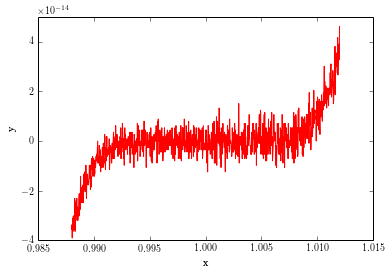

In [11]:
x = numpy.linspace(0.988, 1.012, 1000)
y = x**7 - 7.0 * x**6 + 21.0 * x**5 - 35.0 * x**4 + 35.0 * x**3 - 21.0 * x**2 + 7.0 * x - 1.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, y, 'r')
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

For more examples see the "[100-digit Challenge](http://bookstore.siam.org/ot86/)" book.

## Combination of Error

In general we need to concern ourselves with the combination of both truncation error and floating point error.

### Example

Consider the finite difference approximation where $f(x) = e^x$ and we are evaluating at $x=1$?

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Compare the error between decreasing $\Delta x$ and the true solution $f'(1) = e$.

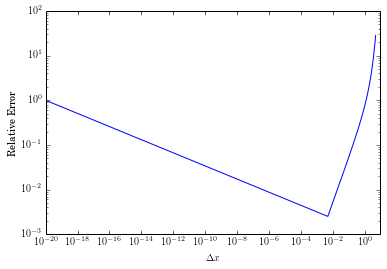

In [12]:
delta_x = numpy.linspace(1e-20, 5.0, 1000)
x = 1.0
f_hat = (numpy.exp(x + delta_x) - numpy.exp(x)) / (delta_x)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(delta_x, numpy.abs(f_hat - numpy.exp(1)) / numpy.exp(1))
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("Relative Error")
plt.show()

### Example 2

Evaluate $e^x$ with its taylor series.

$$e^x = \sum^\infty_{n=0} \frac{x^n}{n!}$$

Can we pick $N < \infty$ that can approximate $e^x$ over a give range $x \in [a,b]$ such that the relative error $E$ satisfies $E < 8 \cdot \varepsilon_{\text{machine}}$?

What might be a better way than simply evaluating the Taylor polynomial directly for various $N$?

22


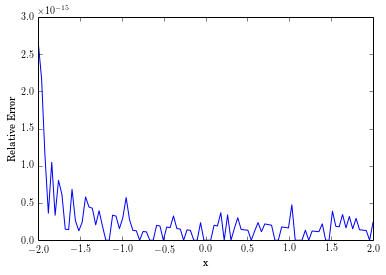

In [13]:
import scipy.misc

def my_exp(x, N=10):
    value = 0.0
    for n in xrange(N + 1):
        value += x**n / scipy.misc.factorial(n)
        
    return value

x = numpy.linspace(-2, 2, 100)
for N in range(1, 50):
    error = numpy.abs((numpy.exp(x) - my_exp(x, N=N)) / numpy.exp(x))
    if numpy.all(error < 100.0 * numpy.finfo(float).eps):
        break

print N

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error)
axes.set_xlabel("x")
axes.set_ylabel("Relative Error")
plt.show()

Some other links that might be helpful regarding IEEE Floating Point:
 - [What Every Computer Scientist Should Know About Floating-Point Arithmetic](http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)
 - [IEEE 754 Floating Point Calculator](http://babbage.cs.qc.edu/courses/cs341/IEEE-754.html)
 - [Numerical Computing with IEEE Floating Point Arithmetic](http://epubs.siam.org/doi/book/10.1137/1.9780898718072)